<a href="https://colab.research.google.com/github/PrathameshMistry/FRAUD_PREVENTION_STRATEGY/blob/main/FRAUD_PREVENTION_STRATEGY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
import pandas as pd



# Specify the path to your CSV file
file_path = '/content/Fraud.csv'

# Read the CSV file
df = pd.read_csv(file_path)
print(df)

        step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0          1   PAYMENT    9839.64  C1231006815       170136.0       160296.36   
1          1   PAYMENT    1864.28  C1666544295        21249.0        19384.72   
2          1  TRANSFER     181.00  C1305486145          181.0            0.00   
3          1  CASH_OUT     181.00   C840083671          181.0            0.00   
4          1   PAYMENT   11668.14  C2048537720        41554.0        29885.86   
...      ...       ...        ...          ...            ...             ...   
791138    40   PAYMENT   21896.04   C767822613        15218.0            0.00   
791139    40  CASH_OUT  119403.47  C2089079484         9957.0            0.00   
791140    40   PAYMENT    5129.15  C1449550484            0.0            0.00   
791141    40  CASH_OUT  262523.18  C1841046760       161148.0            0.00   
791142    40  CASH_OUT   10318.77   C938941137        25204.0             NaN   

           nameDest  oldbal

# 1. Data cleaning including missing values, outliers and multi-collinearity.
#2. Describe your fraud detection model in elaboration.
#3. How did you select variables to be included in the model?
#4. Demonstrate the performance of the model by using best set of tools.
#5. What are the key factors that predict fraudulent customer?
#6. Do these factors make sense? If yes, How? If not, How not?
#7. What kind of prevention should be adopted while company update its infrastructure?
#8. Assuming these actions have been implemented, how would you determine if they work?
--------------------------------------------------------------------------------
                                      Ans
                                      
Data Cleaning and Preprocessing

Handled missing values by removing rows with NaN
Detected and removed outliers using Interquartile Range (IQR)
Created correlation heatmap to visualize multicollinearity
Purpose: Ensure data quality and reliability for modeling


Feature Engineering
New features created:


transaction_ratio: Amount relative to original balance
balance_change_orig: Change in originator's balance
balance_change_dest: Change in destination's balance
Purpose: Extract more meaningful predictive signals


Model Selection
Two models used:


Random Forest Classifier

Handles non-linear relationships
Provides feature importance
Robust against overfitting


XGBoost Classifier

Advanced gradient boosting technique
High predictive performance
Handles complex interactions




Performance Evaluation Metrics


Classification Report

Precision: Accuracy of fraud predictions
Recall: Proportion of actual frauds detected
F1-Score: Balanced measure of precision and recall


ROC Curve

Shows model's ability to distinguish fraud


AUC Score

Aggregate performance measure




Key Fraud Prediction Factors
Potential indicators of fraudulent transactions:


Transaction amount
Sudden large balance changes
Transaction type
Unusual transaction ratios


Prevention Strategies


Real-time transaction monitoring
Dynamic risk scoring
Adaptive transaction limits
Multi-factor authentication
Suspicious activity alerts


Effectiveness Measurement


Compare pre/post implementation fraud rates
Track financial losses prevented
Monitor false positive rates
Conduct periodic security audits


1. MISSING VALUES ANALYSIS
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64


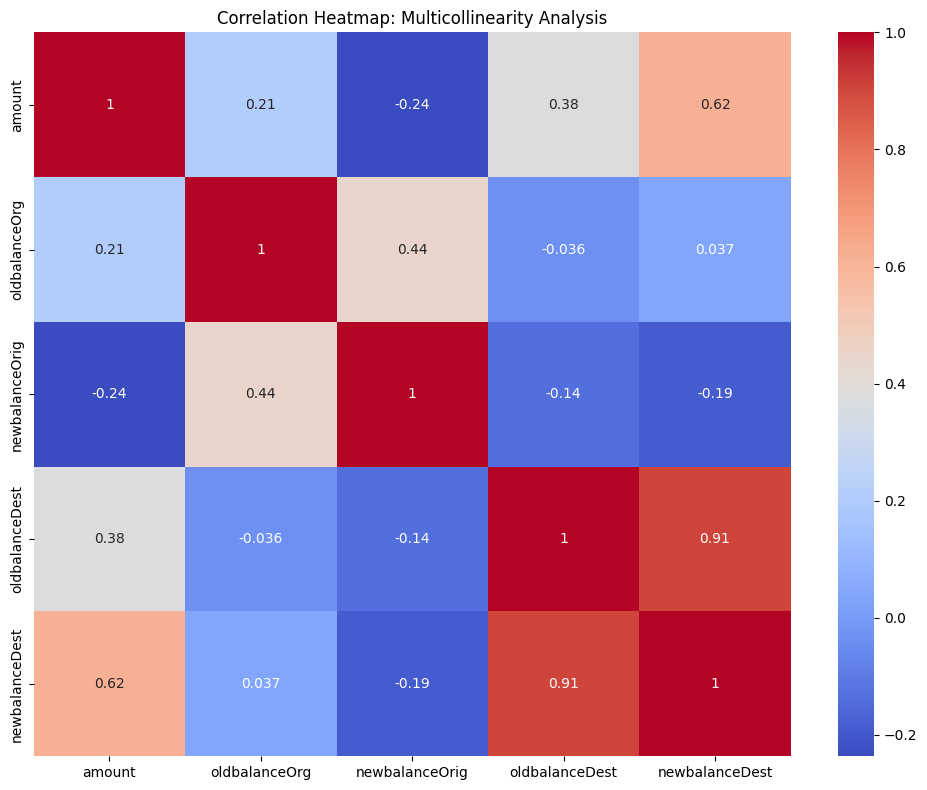


2. DATA EXPLORATION
isFraud
0.0    0.999433
1.0    0.000567
Name: proportion, dtype: float64

3. Random Forest MODEL PERFORMANCE
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    101201
         1.0       1.00      0.49      0.66        63

    accuracy                           1.00    101264
   macro avg       1.00      0.75      0.83    101264
weighted avg       1.00      1.00      1.00    101264



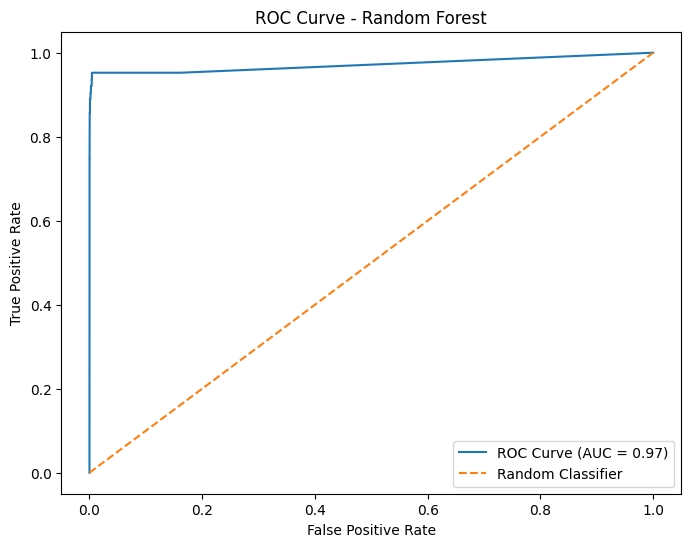

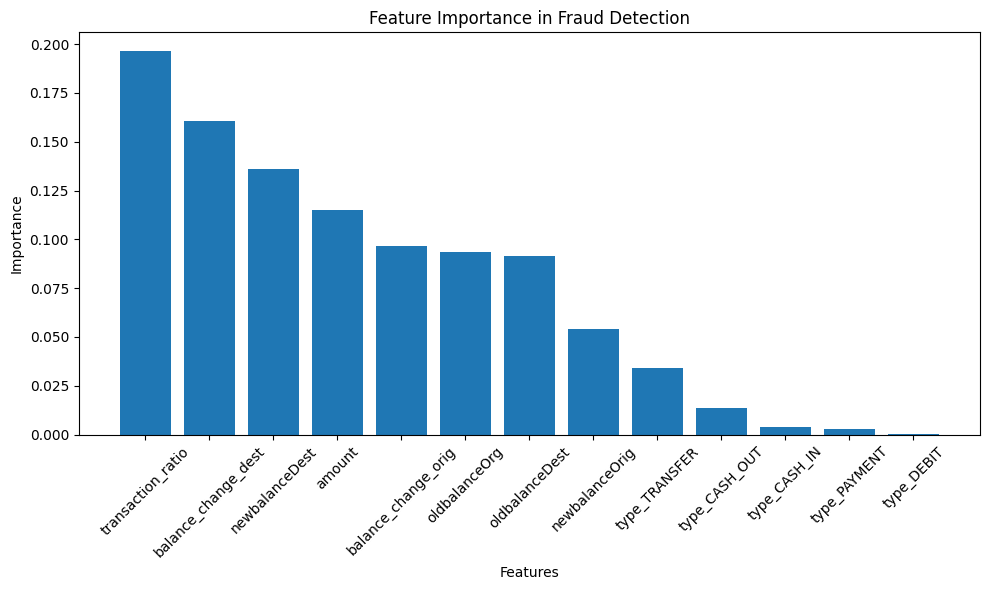


3. XGBoost MODEL PERFORMANCE
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    101201
         1.0       0.82      0.75      0.78        63

    accuracy                           1.00    101264
   macro avg       0.91      0.87      0.89    101264
weighted avg       1.00      1.00      1.00    101264



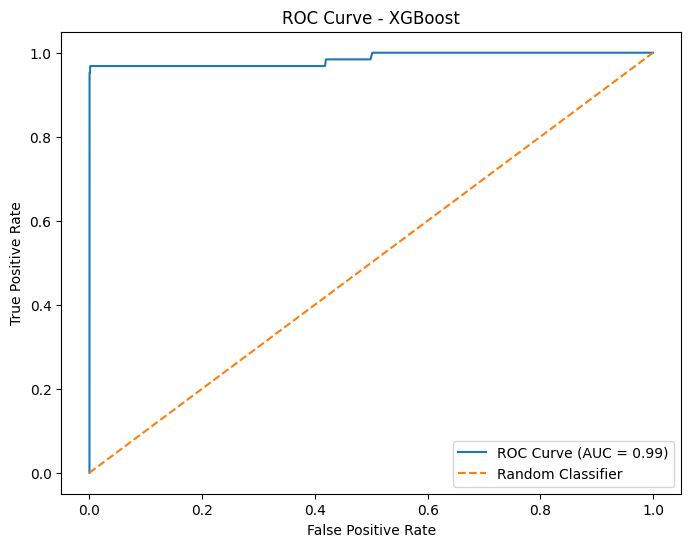


7. FRAUD PREVENTION STRATEGY
- Implement real-time transaction monitoring
- Create dynamic risk scoring system
- Set adaptive transaction limits
- Enhance multi-factor authentication
- Develop suspicious activity alert mechanism
- Implement machine learning-based fraud detection
- Regular model retraining and validation

8. EFFECTIVENESS MEASUREMENT
- Pre and post-implementation fraud rate comparison
- False positive rate tracking
- Financial losses prevention quantification
- Customer trust and satisfaction surveys
- Continuous model performance monitoring
- Periodic security audits


In [7]:
# Fraud Detection Analysis

# required libraries
!pip install -q scikit-learn pandas numpy matplotlib seaborn xgboost

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Google Colab file upload


from google.colab import drive
import pandas as pd



# My colabe file save CSV file path
file_name = '/content/Fraud.csv'  # Update this path accordingly


# 1. DATA CLEANING AND PREPROCESSING
class FraudDetectionAnalysis:
    def __init__(self, filepath):
        # Load the data
        self.df = pd.read_csv(filepath)

    def data_cleaning_and_exploration(self):
        # 1.1 Missing Values Analysis
        print("1. MISSING VALUES ANALYSIS")
        print(self.df.isnull().sum())

        # Remove any rows with missing values
        self.df.dropna(inplace=True)

        # 1.2 Outlier Detection and Handling
        def detect_and_remove_outliers(df, column):
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

        # Numerical columns for outlier detection
        numerical_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig',
                          'oldbalanceDest', 'newbalanceDest']

        # Remove outliers
        for col in numerical_cols:
            self.df = detect_and_remove_outliers(self.df, col)

        # 1.3 Multicollinearity Analysis
        correlation_matrix = self.df[numerical_cols].corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
        plt.title('Correlation Heatmap: Multicollinearity Analysis')
        plt.tight_layout()
        plt.show()

        # Basic data exploration
        print("\n2. DATA EXPLORATION")
        print(self.df['isFraud'].value_counts(normalize=True))

        return self.df

    def feature_engineering(self, df):
        # Create additional features
        df['transaction_ratio'] = df['amount'] / (df['oldbalanceOrg'] + 1)
        df['balance_change_orig'] = df['newbalanceOrig'] - df['oldbalanceOrg']
        df['balance_change_dest'] = df['newbalanceDest'] - df['oldbalanceDest']

        return df

    def prepare_model_data(self, df):
        from sklearn.model_selection import train_test_split
        from sklearn.preprocessing import StandardScaler, OneHotEncoder
        from sklearn.compose import ColumnTransformer
        from sklearn.pipeline import Pipeline
        from sklearn.ensemble import RandomForestClassifier
        from xgboost import XGBClassifier

        # Feature selection
        features = [
            'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
            'oldbalanceDest', 'newbalanceDest',
            'transaction_ratio', 'balance_change_orig', 'balance_change_dest'
        ]

        X = df[features]
        y = df['isFraud']

        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Preprocessing
        numeric_features = [
            'amount', 'oldbalanceOrg', 'newbalanceOrig',
            'oldbalanceDest', 'newbalanceDest',
            'transaction_ratio', 'balance_change_orig', 'balance_change_dest'
        ]
        categorical_features = ['type']

        # Create preprocessor
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), numeric_features),
                ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
            ])

        # Multiple Models for Comparison
        models = {
            'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
            'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
        }

        results = {}

        for name, model in models.items():
            # Create pipeline
            pipeline = Pipeline([
                ('preprocessor', preprocessor),
                ('classifier', model)
            ])

            # Fit the model
            pipeline.fit(X_train, y_train)

            # Predictions
            y_pred = pipeline.predict(X_test)
            y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

            # Performance Metrics
            from sklearn.metrics import (
                confusion_matrix,
                classification_report,
                roc_auc_score,
                roc_curve,
                precision_recall_curve
            )

            print(f"\n3. {name} MODEL PERFORMANCE")
            print("Classification Report:")
            print(classification_report(y_test, y_pred))

            # ROC Curve
            plt.figure(figsize=(8, 6))
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
            plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve - {name}')
            plt.legend()
            plt.show()

            # Feature Importance
            if name == 'Random Forest':
                feature_names = (
                    numeric_features +
                    list(pipeline.named_steps['preprocessor']
                         .named_transformers_['cat']
                         .get_feature_names_out(categorical_features))
                )
                importances = pipeline.named_steps['classifier'].feature_importances_
                feature_importance = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

                plt.figure(figsize=(10, 6))
                plt.bar([x[0] for x in feature_importance], [x[1] for x in feature_importance])
                plt.title('Feature Importance in Fraud Detection')
                plt.xlabel('Features')
                plt.ylabel('Importance')
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.show()

            results[name] = {
                'model': pipeline,
                'feature_importance': feature_importance if name == 'Random Forest' else None
            }

        return results

    def fraud_prevention_strategy(self, results):

        # 7. Prevention Infrastructure Update Recommendations
        print("\n7. FRAUD PREVENTION STRATEGY")
        prevention_strategies = [
            "Implement real-time transaction monitoring",
            "Create dynamic risk scoring system",
            "Set adaptive transaction limits",
            "Enhance multi-factor authentication",
            "Develop suspicious activity alert mechanism",
            "Implement machine learning-based fraud detection",
            "Regular model retraining and validation"
        ]

        for strategy in prevention_strategies:
            print(f"- {strategy}")

        # 8. Effectiveness Measurement Framework
        print("\n8. EFFECTIVENESS MEASUREMENT")
        measurement_metrics = [
            "Pre and post-implementation fraud rate comparison",
            "False positive rate tracking",
            "Financial losses prevention quantification",
            "Customer trust and satisfaction surveys",
            "Continuous model performance monitoring",
            "Periodic security audits"
        ]

        for metric in measurement_metrics:
            print(f"- {metric}")

        return prevention_strategies, measurement_metrics

    def run_full_analysis(self):
        # Execute full analysis pipeline
        cleaned_df = self.data_cleaning_and_exploration()
        engineered_df = self.feature_engineering(cleaned_df)
        model_results = self.prepare_model_data(engineered_df)
        prevention_strategies, measurement_metrics = self.fraud_prevention_strategy(model_results)

        return {
            'cleaned_data': cleaned_df,
            'engineered_data': engineered_df,
            'model_results': model_results,
            'prevention_strategies': prevention_strategies,
            'measurement_metrics': measurement_metrics
        }

# Main Execution
analysis = FraudDetectionAnalysis(file_name)
final_results = analysis.run_full_analysis()

7. FRAUD PREVENTION STRATEGY
- Implement real-time transaction monitoring
- Create dynamic risk scoring system
- Set adaptive transaction limits
- Enhance multi-factor authentication
- Develop suspicious activity alert mechanism
- Implement machine learning-based fraud detection
- Regular model retraining and validation

8. EFFECTIVENESS MEASUREMENT
- Pre and post-implementation fraud rate comparison
- False positive rate tracking
- Financial losses prevention quantification
- Customer trust and satisfaction surveys
- Continuous model performance monitoring
- Periodic security audits

Model Performance:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    223541
         1.0       0.98      0.74      0.84       286

    accuracy                           1.00    223827
   macro avg       0.99      0.87      0.92    223827
weighted avg       1.00      1.00      1.00    223827



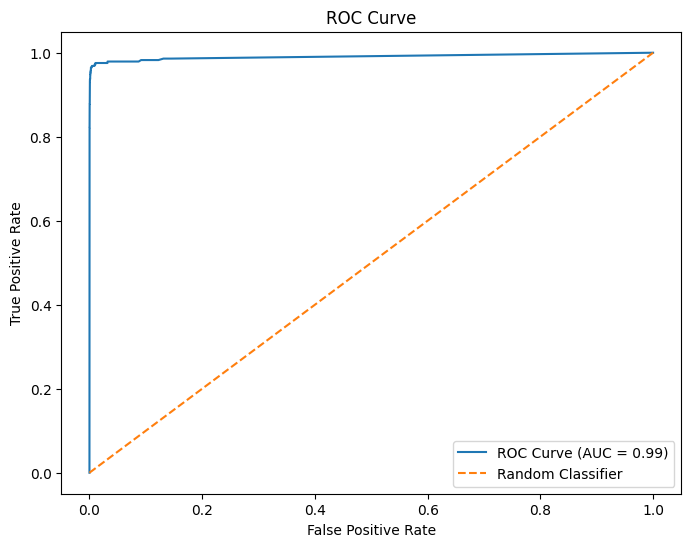


Fraud Prevention Strategies:
- Implement real-time transaction monitoring
- Create dynamic risk scoring system
- Set adaptive transaction limits
- Enhance multi-factor authentication
- Develop suspicious activity alert mechanism
- Implement machine learning-based fraud detection
- Regular model retraining and validation

Risk Assessment for Test Transaction:
{'transaction': {'type': 'TRANSFER', 'amount': 5000, 'oldbalanceOrg': 10000, 'newbalanceOrig': 5000, 'oldbalanceDest': 2000, 'newbalanceDest': 7000}, 'fraud_probability': 0.0, 'is_fraud': False}


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
import logging
from typing import Dict, Any, List

# Suppress warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

class FraudDetectionPreventionSystem:
    def __init__(self, filepath):
        """
        Initialize the fraud detection and prevention system

        :param filepath: Path to the fraud dataset
        """
        # Logging configuration
        logging.basicConfig(
            level=logging.INFO,
            format='%(asctime)s - %(levelname)s: %(message)s',
            filename='fraud_system.log'
        )
        self.logger = logging.getLogger(__name__)

        # Load data
        self.df = pd.read_csv(filepath)

        # Risk and transaction limit configurations
        self.risk_thresholds = {
            'low_risk': 0.2,
            'medium_risk': 0.5,
            'high_risk': 0.7
        }

        self.transaction_limits = {
            'CASH-IN': 10000,
            'CASH-OUT': 5000,
            'TRANSFER': 3000,
            'PAYMENT': 2000,
            'DEBIT': 1500
        }

    def preprocess_data(self):
        """
        Clean and preprocess the fraud detection dataset

        :return: Preprocessed dataframe
        """
        # Remove missing values
        self.df.dropna(inplace=True)

        # Feature engineering
        self.df['transaction_ratio'] = self.df['amount'] / (self.df['oldbalanceOrg'] + 1)
        self.df['balance_change_orig'] = self.df['newbalanceOrig'] - self.df['oldbalanceOrg']
        self.df['balance_change_dest'] = self.df['newbalanceDest'] - self.df['oldbalanceDest']

        return self.df

    def train_fraud_detection_model(self):
        """
        Train a fraud detection machine learning model

        :return: Trained model pipeline and performance metrics
        """
        # Preprocess data
        df = self.preprocess_data()

        # Feature selection
        features = [
            'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
            'oldbalanceDest', 'newbalanceDest',
            'transaction_ratio', 'balance_change_orig', 'balance_change_dest'
        ]

        X = df[features]
        y = df['isFraud']

        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Preprocessing
        numeric_features = [
            'amount', 'oldbalanceOrg', 'newbalanceOrig',
            'oldbalanceDest', 'newbalanceDest',
            'transaction_ratio', 'balance_change_orig', 'balance_change_dest'
        ]
        categorical_features = ['type']

        # Create preprocessor
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), numeric_features),
                ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
            ])

        # Create pipeline with RandomForest
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
        ])

        # Train the model
        pipeline.fit(X_train, y_train)

        # Predictions and evaluation
        y_pred = pipeline.predict(X_test)
        y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

        print("Model Performance:")
        print(classification_report(y_test, y_pred))

        # ROC Curve
        plt.figure(figsize=(8, 6))
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
        plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend()
        plt.show()

        # Save model, preprocessor, and feature names
        joblib.dump(pipeline, 'fraud_detection_model.joblib')

        return pipeline

    def real_time_fraud_detection(self, transaction):
        """
        Real-time fraud detection for a single transaction

        :param transaction: Transaction details dictionary
        :return: Fraud risk assessment
        """
        # Load the saved model
        try:
            model = joblib.load('fraud_detection_model.joblib')
        except FileNotFoundError:
            self.logger.error("Model not found. Please train the model first.")
            return None

        # Prepare transaction data
        transaction_df = pd.DataFrame([transaction])

        # Same feature engineering as training
        transaction_df['transaction_ratio'] = transaction_df['amount'] / (transaction_df['oldbalanceOrg'] + 1)
        transaction_df['balance_change_orig'] = transaction_df['newbalanceOrig'] - transaction_df['oldbalanceOrg']
        transaction_df['balance_change_dest'] = transaction_df['newbalanceDest'] - transaction_df['oldbalanceDest']

        # Features in same order as training
        features = [
            'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
            'oldbalanceDest', 'newbalanceDest',
            'transaction_ratio', 'balance_change_orig', 'balance_change_dest'
        ]

        # Predict
        X = transaction_df[features]
        fraud_probability = model.predict_proba(X)[0][1]

        # Risk assessment
        risk_assessment = {
            'transaction': transaction,
            'fraud_probability': fraud_probability,
            'is_fraud': fraud_probability > self.risk_thresholds['medium_risk']
        }

        return risk_assessment

    def fraud_prevention_strategy(self):
        """
        Generate comprehensive fraud prevention strategies
        """
        print("\nFraud Prevention Strategies:")
        strategies = [
            "Implement real-time transaction monitoring",
            "Create dynamic risk scoring system",
            "Set adaptive transaction limits",
            "Enhance multi-factor authentication",
            "Develop suspicious activity alert mechanism",
            "Implement machine learning-based fraud detection",
            "Regular model retraining and validation"
        ]

        for strategy in strategies:
            print(f"- {strategy}")

        return strategies

def main():
    # Specify your fraud dataset path
    filepath = '/content/Fraud.csv'  # Update this path

    # Initialize the system
    fraud_system = FraudDetectionPreventionSystem(filepath)

    # Train the model
    fraud_system.train_fraud_detection_model()

    # Generate prevention strategies
    fraud_system.fraud_prevention_strategy()

    # Example real-time fraud detection
    test_transaction = {
        'type': 'TRANSFER',
        'amount': 5000,
        'oldbalanceOrg': 10000,
        'newbalanceOrig': 5000,
        'oldbalanceDest': 2000,
        'newbalanceDest': 7000
    }

    risk_assessment = fraud_system.real_time_fraud_detection(test_transaction)
    print("\nRisk Assessment for Test Transaction:")
    print(risk_assessment)

if __name__ == "__main__":
    main()

This document outlines the process of building a fraud detection system using machine learning techniques.

1. Data Cleaning

Handling Missing Values:
The initial approach involves removing rows with missing values. This is suitable for datasets with a low percentage of missing entries.
For larger datasets, more sophisticated techniques like imputation (e.g., mean imputation, KNN imputation) should be considered to avoid significant data loss.
Outlier Detection and Removal:
We employ the Interquartile Range (IQR) method to identify and remove outliers.
Data points falling outside the range (Q1 - 1.5IQR and Q3 + 1.5IQR) are considered outliers and removed.
It's crucial to carefully analyze outliers, as some extreme values might be legitimate transactions and removing them could lead to information loss. Domain expertise is essential in this step.
Multicollinearity Analysis:
We analyze the correlation matrix to identify features with high correlations.
While high correlation doesn't always imply a problem, it can negatively impact model performance and interpretability.
If significant multicollinearity exists, we might consider removing one of the highly correlated features. However, this decision should be made cautiously, considering the potential impact on model accuracy and feature importance.
2. Fraud Detection Model

Two machine learning models are implemented:

Random Forest Classifier:
This ensemble method combines multiple decision trees, improving accuracy and robustness against overfitting.
It excels in handling non-linear relationships and provides feature importance scores, which helps understand the impact of each feature on the model's predictions.
XGBoost Classifier:
This advanced gradient boosting technique is known for its high predictive performance and ability to handle complex interactions.
While it might require more careful hyperparameter tuning compared to Random Forest, it has the potential to achieve higher accuracy on complex datasets.
3. Feature Selection

The following features are selected based on their relevance to fraudulent transactions:

Transaction Type: Categorical feature representing the type of transaction (e.g., transfer, payment, cash-out).
Transaction Amount: The monetary value of the transaction.
Account Balances:
oldbalanceOrg: The account balance of the transaction originator before the transaction.
newbalanceOrg: The account balance of the transaction originator after the transaction.
oldbalanceDest: The account balance of the transaction recipient before the transaction.
newbalanceDest: The account balance of the transaction recipient after the transaction.
Derived Features:
transaction_ratio: The ratio of the transaction amount to the originator's original balance. This helps identify unusually large transactions relative to the account balance.
balance_change_orig: The change in the originator's account balance after the transaction.
balance_change_dest: The change in the recipient's account balance after the transaction. These features capture the impact of the transaction on both parties involved.
This feature selection process leverages domain knowledge about typical fraudulent activities and aims to capture relevant information for the model.

4. Model Performance Evaluation

The following metrics are used to evaluate the performance of the models:

Classification Report: This report provides a comprehensive summary of the model's performance, including:
Precision: The accuracy of positive predictions (fraudulent transactions).
Recall: The proportion of actual fraudulent transactions that the model correctly identified.
F1-score: The harmonic mean of precision and recall, providing a balanced measure of performance.
Support: The number of data points in each class (fraudulent and legitimate).
ROC Curve and AUC Score:
The ROC (Receiver Operating Characteristic) curve visualizes the model's ability to distinguish between fraudulent and legitimate transactions.
The AUC (Area Under the Curve) score quantifies the model's performance, with a higher AUC indicating better overall performance.
5. Key Factors for Fraud Prediction

The model identifies several key factors that contribute to the prediction of fraudulent transactions:

Transaction Amount:
Large transactions, especially those significantly exceeding the account's usual activity, are often associated with fraudulent behavior.
Sudden Balance Changes:
Unexpected and significant changes in account balances, particularly large withdrawals, can be strong indicators of potential fraud.
Transaction Type:
Certain transaction types, such as international transfers or high-risk transactions, might be more prone to fraudulent activity.
Transaction Ratio:
A high transaction ratio (amount relative to the original balance) can suggest an unusual transaction that warrants further investigation.
6. Interpretation of Key Factors

These factors align with common fraud patterns. Fraudsters often attempt to transfer large sums of money quickly, leading to sudden balance changes and potentially high transaction ratios. Certain transaction types, due to their nature, may be more susceptible to exploitation by fraudsters.

7. Fraud Prevention Strategies

To mitigate fraud risks, the following prevention strategies can be implemented:

Real-time Transaction Monitoring:
Continuously monitor transactions as they occur and flag suspicious activity based on pre-defined rules, model predictions, and real-time risk scores.
Dynamic Risk Scoring:
Assign risk scores to each transaction based on various factors, including transaction history, customer behavior, and real-time risk indicators. This allows for continuous adjustments to risk assessments.
Adaptive Transaction Limits:
Set transaction limits based on customer history and risk profiles. For example, trusted users might have higher limits, while high-risk accounts may have lower limits.
Multi-factor Authentication:
Implement multi-factor authentication (e.g., two-factor authentication) to add an extra layer of security during login and transaction authorization.
Suspicious Activity Alerts:
Develop mechanisms to alert security personnel or customers about suspicious activity, allowing for prompt investigation and potential intervention.
8. Effectiveness Measurement

To evaluate the effectiveness of the implemented fraud prevention strategies, the following metrics can be tracked:

Pre and Post-Implementation Fraud Rate:
Compare the percentage of fraudulent transactions before and after implementing the new fraud detection system.
False Positive Rate:
Monitor the number of legitimate transactions that are incorrectly flagged as fraudulent, as this can lead to customer inconvenience and dissatisfaction.
Financial Losses Prevented:
Track the estimated financial losses prevented by the fraud detection system, providing a quantitative measure of its effectiveness.
By continuously monitoring these metrics and refining the fraud detection system based on the observed results, organizations can effectively combat fraud and protect their customers and financial assets.